# Creating a KNN algo from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from collections import Counter
from math import sqrt

We have two classes k and r

In [2]:
dataset={'k':[[1,2],[2,3],[3,4]],'r':[[6,5],[7,7],[8,6]]}

In [3]:
new_features=[5,7] #we have to predict its class

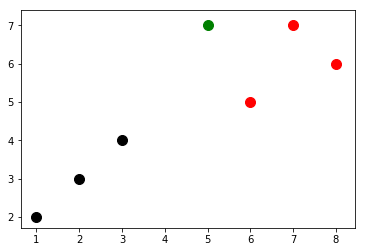

In [4]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],s=100,color=i)
        
plt.scatter(new_features[0],new_features[1],s=100,color='g')        
plt.show()        

# Prediction

In [5]:
def k_nearest_neighbors(data,predict,k=3):
    if len(data)>=k:
        warnings.warn('k is set to value less than the total groups')
    distances=[]
    for group in data:
        for features in data[group]:
            euclidean_distance=np.linalg.norm(np.array(features)-np.array(predict))
            #linalg=linear algebra
            distances.append([euclidean_distance,group])
    
    votes=[i[1] for i in sorted(distances)[:k]]
    print(Counter(votes).most_common(1))
    vote_result=Counter(votes).most_common(1)[0][0]
    confidence=Counter(votes).most_common(1)[0][1]/k
    
    return vote_result,confidence    

In [6]:
result,confidence=k_nearest_neighbors(dataset,new_features,k=3)
print(result,confidence)

[('r', 3)]
r 1.0


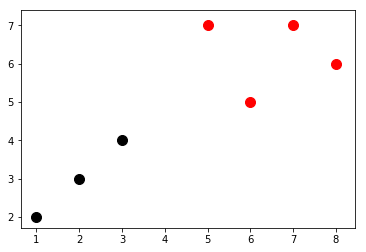

In [7]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],s=100,color=i)
        
plt.scatter(new_features[0],new_features[1],s=100,color=result)        
plt.show()   

------

# Applying our KNN algo on cancer dataset and compare the accuracy with scikit learn

-----

In [8]:
import pandas as pd
import random

In [9]:
df=pd.read_csv("breast-cancer-wisconsin.data.txt")

In [10]:
df.replace('?',-99999,inplace=True)

In [11]:
df.drop(['id'],1,inplace=True)

In [12]:
full_data=df.astype(float).values.tolist()

In [13]:
print(full_data[:10])

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0], [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0], [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]]


In [14]:
random.shuffle(full_data)

In [15]:
print(full_data[:10])

[[5.0, 4.0, 3.0, 1.0, 2.0, -99999.0, 2.0, 3.0, 1.0, 2.0], [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0], [8.0, 10.0, 10.0, 7.0, 10.0, 10.0, 7.0, 3.0, 8.0, 4.0], [8.0, 10.0, 4.0, 4.0, 8.0, 10.0, 8.0, 2.0, 1.0, 4.0], [1.0, 3.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0], [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [10.0, 10.0, 10.0, 4.0, 8.0, 1.0, 8.0, 10.0, 1.0, 4.0], [10.0, 7.0, 7.0, 3.0, 8.0, 5.0, 7.0, 4.0, 3.0, 4.0], [3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0]]


In [16]:
test_size=0.2
train_set={2:[] ,4:[]}
test_set={2:[] ,4:[]}
train_data=full_data[:-int(test_size*len(full_data))]
test_data=full_data[int(test_size*len(full_data)):]

#populating the data
for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])    

In [17]:
correct=0
total=0

In [20]:
for group in test_set:
    for data in test_set[group]:
        vote,confidence=k_nearest_neighbors(train_set,data,k=3)
        if group==vote:
            correct+=1
        else: print(confidence)    
        total+=1    

[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(4, 2)]
0.6666666666666666
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 2)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(4, 2)]
0.6666666666666666
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(4, 2)]
0.6666666666666666
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)]
[(2, 3)

In [21]:
print('Accuracy',correct/total)

Accuracy 0.975
